# Real Madrid Campeon 2023 - 2024

In this notebook Im gonna try to predict how many points is going to make Real Madrid at the end of the upcoming season 2023 - 2024

In [1]:
import pandas as pd

In [164]:
import matplotlib.pyplot as plt

In [109]:
Spa1_league = pd.read_csv("Spa1_league.csv")

First I am gonna need to remove the extra columns "Unnamed" and "index", resulting from the previous conversion

In [111]:
Spa1_league = Spa1_league.drop('Unnamed: 0', axis=1)
Spa1_league = Spa1_league.drop('index', axis = 1)
Spa1_league.head()

,League,Season,Home_Team,Away_Team,Home_Goals,Away_Goals,Home_FH,Away_FH,Home_Win,Draw,Away_Win,Over_2_5,Under_2_5,Code_1,Code_2,Total_Goals,FH_Goals,Winner,HT_Winner
0,Spa1,20,Bilbao,Barcelona,1,0,0,0,5340.0,3620.0,1780.0,1980,1930,3008,3018,1,0,H,D
1,Spa1,20,Mallorca,Eibar,2,1,1,0,2820.0,3190.0,2770.0,2430,1600,3009,3039,3,1,H,H
2,Spa1,20,Valencia,Real Sociedad,1,1,0,0,1690.0,3880.0,5470.0,2060,1850,3019,3015,2,0,D,D
3,Spa1,20,Villarreal,Granada,4,4,1,1,1540.0,4190.0,6870.0,1950,1950,3020,3033,8,2,D,D
4,Spa1,20,Celta Vigo,Real Madrid,1,3,0,1,5100.0,4460.0,1650.0,1490,2760,3022,3010,4,1,A,A


## Add new features
Now, I want to make some new features:
- **Matchday**: the game played in the whole season.
- **Madrid Result**: W, D and L if Madrid won, drawn or lost the game.
- **Home or Visit**: a variable that says is Madrid was playing home or visiting,
- **Madrid Rival**: a variable that contains the Madrid rival in that game.
- **Cummulative Points**: Cummulative points till that game.

In [112]:
matchday = []
for j in range(0,4):
    s = 20 + j
    for i in range(len(Spa1_league.query(f"Season == {s}"))):
        md = (i//10) + 1
        matchday.append(md)

In [113]:
Spa1_league.insert(2, "Matchday", matchday, True)

In [114]:
Spa1_league.query("Season == 23").query("Matchday == 38")

,League,Season,Matchday,Home_Team,Away_Team,Home_Goals,Away_Goals,Home_FH,Away_FH,Home_Win,Draw,Away_Win,Over_2_5,Under_2_5,Code_1,Code_2,Total_Goals,FH_Goals,Winner,HT_Winner
1510,Spa1,23,38,Betis,Valencia,1,1,1,0,3140.0,3110.0,2580.0,2250,1700,3002,3019,2,1,D,H
1511,Spa1,23,38,Espanyol,Almeria,3,3,1,1,2440.0,3800.0,2840.0,1500,2700,3005,3027,6,2,D,D
1512,Spa1,23,38,Osasuna,Girona,2,1,0,0,2090.0,3690.0,3600.0,1800,2090,3007,3053,3,0,H,D
1513,Spa1,23,38,Mallorca,Vallecano,3,0,0,0,3170.0,3170.0,2520.0,2470,1590,3009,3034,3,0,H,D
1514,Spa1,23,38,Real Madrid,Bilbao,1,1,0,0,1680.0,4380.0,4840.0,1560,2530,3010,3008,2,0,D,D
1515,Spa1,23,38,Real Sociedad,FC Sevilla,2,1,1,0,1570.0,4350.0,6070.0,1850,2040,3015,3013,3,1,H,H
1516,Spa1,23,38,Villarreal,Atletico,2,2,1,1,2740.0,3800.0,2480.0,1460,2940,3020,3003,4,2,D,D
1517,Spa1,23,38,Celta Vigo,Barcelona,2,1,1,0,2870.0,3580.0,2510.0,1980,1910,3022,3018,3,1,H,H
1518,Spa1,23,38,Valladolid,Getafe,0,0,0,0,2000.0,3330.0,4370.0,2360,1640,3028,3012,0,0,D,D
1519,Spa1,23,38,Elche,Cadiz,1,1,0,1,2510.0,3200.0,3150.0,1900,1990,3040,3023,2,1,D,A


## Aqui voy a practicar cosas solo con el Real Madrid del 2022

In [115]:
Madrid_2022 = Spa1_league.query("Season == 22").query("Home_Team == 'Real Madrid' or Away_Team == 'Real Madrid'").reset_index()

In [ ]:
Madrid_2022 = Madrid_2022.drop('index', axis = 1)
Madrid_2022

,League,Season,Matchday,Home_Team,Away_Team,Home_Goals,Away_Goals,Home_FH,Away_FH,Home_Win,Draw,Away_Win,Over_2_5,Under_2_5,Code_1,Code_2,Total_Goals,FH_Goals,Winner,HT_Winner
0,Spa1,22,1,Alaves,Real Madrid,1,4,0,0,7380.0,4630.0,1480.0,1820,2080,3021,3010,5,0,A,D
1,Spa1,22,2,Levante,Real Madrid,3,3,0,1,5140.0,4470.0,1650.0,1610,2450,3016,3010,6,1,D,A
2,Spa1,22,3,Betis,Real Madrid,0,1,0,0,3970.0,3840.0,1960.0,1690,2290,3002,3010,1,0,A,D
3,Spa1,22,4,Real Madrid,Celta Vigo,5,2,1,2,1400.0,5260.0,8220.0,1560,2570,3010,3022,7,3,H,A
4,Spa1,22,5,Valencia,Real Madrid,1,2,0,0,3840.0,4020.0,1940.0,1740,2200,3019,3010,3,0,A,D
5,Spa1,22,6,Real Madrid,Mallorca,6,1,3,1,1220.0,5500.0,11000.0,1570,2250,3010,3009,7,4,H,H
6,Spa1,22,6,Real Madrid,Villarreal,0,0,0,0,1510.0,4890.0,6320.0,1630,2420,3010,3020,0,0,D,D
7,Spa1,22,8,Espanyol,Real Madrid,2,1,1,0,5350.0,4160.0,1680.0,1760,2170,3005,3010,3,1,H,H
8,Spa1,22,10,Barcelona,Real Madrid,1,2,0,1,2460.0,3830.0,2820.0,1560,2570,3018,3010,3,1,A,A
9,Spa1,22,11,Real Madrid,Osasuna,0,0,0,0,1290.0,6180.0,10050.0,1560,2540,3010,3007,0,0,D,D


In [117]:
Madrid_2022.filter(['Home_Team', 'Code_1']).drop_duplicates()

,Home_Team,Code_1
0,Alaves,3021
1,Levante,3016
2,Betis,3002
3,Real Madrid,3010
4,Valencia,3019
7,Espanyol,3005
8,Barcelona,3018
10,Elche,3040
12,Granada,3033
15,Real Sociedad,3015


Theres some errors in Matchday so Im gonna change them

In [118]:
for i in Madrid_2022.index:
    Madrid_2022['Matchday'].iloc[i] = i+1


/var/folders/c5/d9gjzjp97kxc9lwztd1vtkn00000gn/T/ipykernel_54302/792658771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Madrid_2022['Matchday'].iloc[i] = i+1
/var/folders/c5/d9gjzjp97kxc9lwztd1vtkn00000gn/T/ipykernel_54302/792658771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Madrid_2022['Matchday'].iloc[i] = i+1
/var/folders/c5/d9gjzjp97kxc9lwztd1vtkn00000gn/T/ipykernel_54302/792658771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [119]:
len(Madrid_2022.columns)

20

In [120]:
Madrid_2022

,League,Season,Matchday,Home_Team,Away_Team,Home_Goals,Away_Goals,Home_FH,Away_FH,Home_Win,Draw,Away_Win,Over_2_5,Under_2_5,Code_1,Code_2,Total_Goals,FH_Goals,Winner,HT_Winner
0,Spa1,22,1,Alaves,Real Madrid,1,4,0,0,7380.0,4630.0,1480.0,1820,2080,3021,3010,5,0,A,D
1,Spa1,22,2,Levante,Real Madrid,3,3,0,1,5140.0,4470.0,1650.0,1610,2450,3016,3010,6,1,D,A
2,Spa1,22,3,Betis,Real Madrid,0,1,0,0,3970.0,3840.0,1960.0,1690,2290,3002,3010,1,0,A,D
3,Spa1,22,4,Real Madrid,Celta Vigo,5,2,1,2,1400.0,5260.0,8220.0,1560,2570,3010,3022,7,3,H,A
4,Spa1,22,5,Valencia,Real Madrid,1,2,0,0,3840.0,4020.0,1940.0,1740,2200,3019,3010,3,0,A,D
5,Spa1,22,6,Real Madrid,Mallorca,6,1,3,1,1220.0,5500.0,11000.0,1570,2250,3010,3009,7,4,H,H
6,Spa1,22,7,Real Madrid,Villarreal,0,0,0,0,1510.0,4890.0,6320.0,1630,2420,3010,3020,0,0,D,D
7,Spa1,22,8,Espanyol,Real Madrid,2,1,1,0,5350.0,4160.0,1680.0,1760,2170,3005,3010,3,1,H,H
8,Spa1,22,9,Barcelona,Real Madrid,1,2,0,1,2460.0,3830.0,2820.0,1560,2570,3018,3010,3,1,A,A
9,Spa1,22,10,Real Madrid,Osasuna,0,0,0,0,1290.0,6180.0,10050.0,1560,2540,3010,3007,0,0,D,D


### I'm gonna make a new feature that contains **W** if Madrid Won, **D** if it was a draw and **L** if madrid lost.

In [121]:
mwinner = [] #if madrid won the game
for i in range(len(Madrid_2022)):
    if Madrid_2022['Winner'].iloc[i] == 'H':
        if Madrid_2022['Code_1'].iloc[i] == 3010:
            mwinner.append('W')
        else:
            mwinner.append('L')
    elif Madrid_2022['Winner'].iloc[i] == 'A':
        if Madrid_2022['Code_2'].iloc[i] == 3010:
            mwinner.append('W')
        else:
            mwinner.append('L')
    else:
        mwinner.append('D')

Same but this variable tells if Madrid was wining, drawing or loosing the game at the end of first half

In [122]:
mwinner_ht = [] #if madrid was winning at half time
for i in range(len(Madrid_2022)):
    if Madrid_2022['HT_Winner'].iloc[i] == 'H':
        if Madrid_2022['Code_1'].iloc[i] == 3010:
            mwinner_ht.append('W')
        else:
            mwinner_ht.append('L')
    elif Madrid_2022['HT_Winner'].iloc[i] == 'A':
        if Madrid_2022['Code_2'].iloc[i] == 3010:
            mwinner_ht.append('W')
        else:
            mwinner_ht.append('L')
    else:
        mwinner_ht.append('D')

### If madrid was at home or away

In [134]:
h_or_a = []
for i in range(len(Madrid_2022)):
    if Madrid_2022['Code_1'].iloc[i] == 3010:
        h_or_a.append(1)
    else:
        h_or_a.append(0)

### Madrid rival

In [135]:
m_rival = []
for i in range(len(h_or_a)):
    if h_or_a[i] == 1:
        m_rival.append(Madrid_2022['Away_Team'].iloc[i])
    else:
        m_rival.append(Madrid_2022['Home_Team'].iloc[i])

### Madrid Goals & Rival Goals

In [136]:
m_goals = []
for i in range(len(h_or_a)):
    if h_or_a[i] == 1:
        m_goals.append(Madrid_2022['Home_Goals'].iloc[i])
    else:
        m_goals.append(Madrid_2022['Away_Goals'].iloc[i])

In [143]:
rival_goals = []
for i in range(len(h_or_a)):
    if h_or_a[i] == 1:
        rival_goals.append(Madrid_2022['Away_Goals'].iloc[i])
    else:
        rival_goals.append(Madrid_2022['Home_Goals'].iloc[i])

In [144]:
len(rival_goals)

38

### Madrid and Rival Goals at First Half

In [145]:
fh_m_goals = []
for i in range(len(h_or_a)):
    if h_or_a[i] == 1:
        fh_m_goals.append(Madrid_2022['Home_FH'].iloc[i])
    else:
        fh_m_goals.append(Madrid_2022['Away_FH'].iloc[i])

In [146]:
fh_r_goals = []
for i in range(len(h_or_a)):
    if h_or_a[i] == 1:
        fh_r_goals.append(Madrid_2022['Away_FH'].iloc[i])
    else:
        fh_r_goals.append(Madrid_2022['Home_FH'].iloc[i])

In [147]:
len(fh_m_goals)

38

In [148]:
len(fh_r_goals)

38

### Odds that Madrid Wins, Draw o Lose

In [149]:
odds_m_win = []
for i in range(len(h_or_a)):
    if h_or_a[i] == 1:
        odds_m_win.append(Madrid_2022['Home_Win'].iloc[i])
    else:
        odds_m_win.append(Madrid_2022['Away_Win'].iloc[i])

In [150]:
odds_m_lose = []
for i in range(len(h_or_a)):
    if h_or_a[i] == 1:
        odds_m_lose.append(Madrid_2022['Away_Win'].iloc[i])
    else:
        odds_m_lose.append(Madrid_2022['Home_Win'].iloc[i])

## Adding and removing features

In [151]:
#Results
if "Result" not in Madrid_2022.columns:
    Madrid_2022.insert(19, "Result", mwinner, True)
Madrid_2022 = Madrid_2022.drop('Winner', axis = 1)
Madrid_2022.head()

,League,Season,Matchday,Home_Team,Away_Team,Home_Goals,Away_Goals,Home_FH,Away_FH,Home_Win,Draw,Away_Win,Over_2_5,Under_2_5,Code_1,Code_2,Total_Goals,FH_Goals,Result,HT_Winner
0,Spa1,22,1,Alaves,Real Madrid,1,4,0,0,7380.0,4630.0,1480.0,1820,2080,3021,3010,5,0,W,D
1,Spa1,22,2,Levante,Real Madrid,3,3,0,1,5140.0,4470.0,1650.0,1610,2450,3016,3010,6,1,D,A
2,Spa1,22,3,Betis,Real Madrid,0,1,0,0,3970.0,3840.0,1960.0,1690,2290,3002,3010,1,0,W,D
3,Spa1,22,4,Real Madrid,Celta Vigo,5,2,1,2,1400.0,5260.0,8220.0,1560,2570,3010,3022,7,3,W,A
4,Spa1,22,5,Valencia,Real Madrid,1,2,0,0,3840.0,4020.0,1940.0,1740,2200,3019,3010,3,0,W,D


In [152]:
#Results at Half Time
if "Result_HT" not in Madrid_2022.columns:
    Madrid_2022.insert(19, "Result_HT", mwinner_ht, True)
Madrid_2022 = Madrid_2022.drop('HT_Winner', axis = 1)
Madrid_2022.head()

,League,Season,Matchday,Home_Team,Away_Team,Home_Goals,Away_Goals,Home_FH,Away_FH,Home_Win,Draw,Away_Win,Over_2_5,Under_2_5,Code_1,Code_2,Total_Goals,FH_Goals,Result,Result_HT
0,Spa1,22,1,Alaves,Real Madrid,1,4,0,0,7380.0,4630.0,1480.0,1820,2080,3021,3010,5,0,W,D
1,Spa1,22,2,Levante,Real Madrid,3,3,0,1,5140.0,4470.0,1650.0,1610,2450,3016,3010,6,1,D,W
2,Spa1,22,3,Betis,Real Madrid,0,1,0,0,3970.0,3840.0,1960.0,1690,2290,3002,3010,1,0,W,D
3,Spa1,22,4,Real Madrid,Celta Vigo,5,2,1,2,1400.0,5260.0,8220.0,1560,2570,3010,3022,7,3,W,L
4,Spa1,22,5,Valencia,Real Madrid,1,2,0,0,3840.0,4020.0,1940.0,1740,2200,3019,3010,3,0,W,D


In [153]:
#Madrid was at home or not
if "Home" not in Madrid_2022.columns:
    Madrid_2022.insert(3, "Home", h_or_a, True)
Madrid_2022 = Madrid_2022.drop('Home_Team', axis = 1)
Madrid_2022 = Madrid_2022.drop('Away_Team', axis = 1)
Madrid_2022.head()

,League,Season,Matchday,Home,Home_Goals,Away_Goals,Home_FH,Away_FH,Home_Win,Draw,Away_Win,Over_2_5,Under_2_5,Code_1,Code_2,Total_Goals,FH_Goals,Result,Result_HT
0,Spa1,22,1,0,1,4,0,0,7380.0,4630.0,1480.0,1820,2080,3021,3010,5,0,W,D
1,Spa1,22,2,0,3,3,0,1,5140.0,4470.0,1650.0,1610,2450,3016,3010,6,1,D,W
2,Spa1,22,3,0,0,1,0,0,3970.0,3840.0,1960.0,1690,2290,3002,3010,1,0,W,D
3,Spa1,22,4,1,5,2,1,2,1400.0,5260.0,8220.0,1560,2570,3010,3022,7,3,W,L
4,Spa1,22,5,0,1,2,0,0,3840.0,4020.0,1940.0,1740,2200,3019,3010,3,0,W,D


In [154]:
#Madrid rival
if "Rival" not in Madrid_2022.columns:
    Madrid_2022.insert(4, "Rival", m_rival, True)
Madrid_2022.head()

,League,Season,Matchday,Home,Rival,Home_Goals,Away_Goals,Home_FH,Away_FH,Home_Win,Draw,Away_Win,Over_2_5,Under_2_5,Code_1,Code_2,Total_Goals,FH_Goals,Result,Result_HT
0,Spa1,22,1,0,Alaves,1,4,0,0,7380.0,4630.0,1480.0,1820,2080,3021,3010,5,0,W,D
1,Spa1,22,2,0,Levante,3,3,0,1,5140.0,4470.0,1650.0,1610,2450,3016,3010,6,1,D,W
2,Spa1,22,3,0,Betis,0,1,0,0,3970.0,3840.0,1960.0,1690,2290,3002,3010,1,0,W,D
3,Spa1,22,4,1,Celta Vigo,5,2,1,2,1400.0,5260.0,8220.0,1560,2570,3010,3022,7,3,W,L
4,Spa1,22,5,0,Valencia,1,2,0,0,3840.0,4020.0,1940.0,1740,2200,3019,3010,3,0,W,D


In [155]:
#Madrid Goals
if "Madrid_Goals" not in Madrid_2022.columns:
    Madrid_2022.insert(5, "Madrid_Goals", m_goals, True)

In [156]:
#Rival Goals
if "Rival_Goals" not in Madrid_2022.columns:
    Madrid_2022.insert(6, "Rival_Goals", rival_goals, True)
Madrid_2022.head()

,League,Season,Matchday,Home,Rival,Madrid_Goals,Rival_Goals,Home_Goals,Away_Goals,Home_FH,...,Draw,Away_Win,Over_2_5,Under_2_5,Code_1,Code_2,Total_Goals,FH_Goals,Result,Result_HT
0,Spa1,22,1,0,Alaves,4,1,1,4,0,...,4630.0,1480.0,1820,2080,3021,3010,5,0,W,D
1,Spa1,22,2,0,Levante,3,3,3,3,0,...,4470.0,1650.0,1610,2450,3016,3010,6,1,D,W
2,Spa1,22,3,0,Betis,1,0,0,1,0,...,3840.0,1960.0,1690,2290,3002,3010,1,0,W,D
3,Spa1,22,4,1,Celta Vigo,5,2,5,2,1,...,5260.0,8220.0,1560,2570,3010,3022,7,3,W,L
4,Spa1,22,5,0,Valencia,2,1,1,2,0,...,4020.0,1940.0,1740,2200,3019,3010,3,0,W,D


In [157]:
Madrid_2022 = Madrid_2022.drop('Home_Goals', axis = 1)
Madrid_2022 = Madrid_2022.drop('Away_Goals', axis = 1)
Madrid_2022.head()

,League,Season,Matchday,Home,Rival,Madrid_Goals,Rival_Goals,Home_FH,Away_FH,Home_Win,Draw,Away_Win,Over_2_5,Under_2_5,Code_1,Code_2,Total_Goals,FH_Goals,Result,Result_HT
0,Spa1,22,1,0,Alaves,4,1,0,0,7380.0,4630.0,1480.0,1820,2080,3021,3010,5,0,W,D
1,Spa1,22,2,0,Levante,3,3,0,1,5140.0,4470.0,1650.0,1610,2450,3016,3010,6,1,D,W
2,Spa1,22,3,0,Betis,1,0,0,0,3970.0,3840.0,1960.0,1690,2290,3002,3010,1,0,W,D
3,Spa1,22,4,1,Celta Vigo,5,2,1,2,1400.0,5260.0,8220.0,1560,2570,3010,3022,7,3,W,L
4,Spa1,22,5,0,Valencia,2,1,0,0,3840.0,4020.0,1940.0,1740,2200,3019,3010,3,0,W,D


In [158]:
Madrid_2022 = Madrid_2022.drop('Home_FH', axis = 1)
Madrid_2022 = Madrid_2022.drop('Away_FH', axis = 1)
Madrid_2022 = Madrid_2022.drop('Home_Win', axis = 1)
Madrid_2022 = Madrid_2022.drop('Away_Win', axis = 1)
Madrid_2022 = Madrid_2022.drop('Code_1', axis = 1)
Madrid_2022 = Madrid_2022.drop('Code_2', axis = 1)

In [159]:
#Madrid goals at First Half
if "Madrid_Goals_FH" not in Madrid_2022.columns:
    Madrid_2022.insert(7, "Madrid_Goals_FH", fh_m_goals, True)

#Rival Goals at First Half
fh_r_goals
if "Rival_Goals_FH" not in Madrid_2022.columns:
    Madrid_2022.insert(8, "Rival_Goals_FH", fh_r_goals, True)

In [161]:
#Odds of Madrid Wins or Lose
if "Madrid_Win" not in Madrid_2022.columns:
    Madrid_2022.insert(9, "Madrid_Win", odds_m_win, True)
if "Madrid_Lose" not in Madrid_2022.columns:
    Madrid_2022.insert(11, "Madrid_Lose", odds_m_lose, True)

In [167]:
Madrid_2022.head()

,League,Season,Matchday,Home,Rival,Madrid_Goals,Rival_Goals,Madrid_Goals_FH,Rival_Goals_FH,Madrid_Win,Draw,Madrid_Lose,Over_2_5,Under_2_5,Total_Goals,FH_Goals,Result,Result_HT
0,Spa1,22,1,0,Alaves,4,1,0,0,1480.0,4630.0,7380.0,1820,2080,5,0,W,D
1,Spa1,22,2,0,Levante,3,3,1,0,1650.0,4470.0,5140.0,1610,2450,6,1,D,W
2,Spa1,22,3,0,Betis,1,0,0,0,1960.0,3840.0,3970.0,1690,2290,1,0,W,D
3,Spa1,22,4,1,Celta Vigo,5,2,1,2,1400.0,5260.0,8220.0,1560,2570,7,3,W,L
4,Spa1,22,5,0,Valencia,2,1,0,0,1940.0,4020.0,3840.0,1740,2200,3,0,W,D


In [172]:
points = []
p = 0
for i in range(len(Madrid_2022)):
    if Madrid_2022['Result'].iloc[i] == 'W':
        p += 3
        points.append(p)
    elif Madrid_2022['Result'].iloc[i] == 'D':
        p += 1
        points.append(p)
    else:
        p += 0
        points.append(p)

In [174]:
if "Points" not in Madrid_2022.columns:
    Madrid_2022.insert(18, "Points", points, True)
Madrid_2022.head()

,League,Season,Matchday,Home,Rival,Madrid_Goals,Rival_Goals,Madrid_Goals_FH,Rival_Goals_FH,Madrid_Win,Draw,Madrid_Lose,Over_2_5,Under_2_5,Total_Goals,FH_Goals,Result,Result_HT,Points
0,Spa1,22,1,0,Alaves,4,1,0,0,1480.0,4630.0,7380.0,1820,2080,5,0,W,D,3
1,Spa1,22,2,0,Levante,3,3,1,0,1650.0,4470.0,5140.0,1610,2450,6,1,D,W,4
2,Spa1,22,3,0,Betis,1,0,0,0,1960.0,3840.0,3970.0,1690,2290,1,0,W,D,7
3,Spa1,22,4,1,Celta Vigo,5,2,1,2,1400.0,5260.0,8220.0,1560,2570,7,3,W,L,10
4,Spa1,22,5,0,Valencia,2,1,0,0,1940.0,4020.0,3840.0,1740,2200,3,0,W,D,13


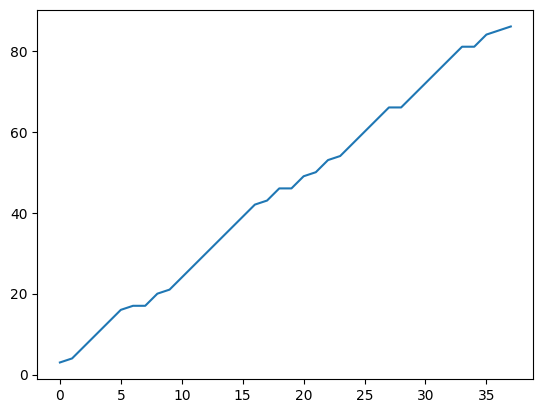

In [175]:
Madrid_2022['Points'].plot()
plt.show()

In [ ]:
Madrid_2022